# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [178]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.




**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [179]:
# Setup our dataframe
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [180]:
# Find number of rows in the data
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [181]:
# Find the number of unique users
unique_users = df['user_id'].nunique()
unique_users

290584

**d.** The proportion of users converted.

In [182]:
# Get the proportion of users that converted to the new_page
prop_converted = df['converted'].mean() * 100
prop_converted

11.96591935560551

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [183]:
# Find count of rows that the treatment group did not get the new_page
bad = df.query('group == "treatment" and landing_page != "new_page"').count()
bad[0]

1965

**f.** Do any of the rows have missing values?

In [184]:
# Check dataframe for missing (null) values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [185]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
drop_treat = df[(df['group'] == "treatment") & (df['landing_page'] != "new_page")].index
drop_cont = df[(df['group'] == "control") & (df['landing_page'] != "old_page")].index

drop_rows = [*drop_treat, *drop_cont]
df2 = df.drop(drop_rows, axis=0)

In [186]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [187]:
# Find number of unique user_ids
users = df2['user_id'].nunique()
users

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [188]:
# Find the duplicated user_id
dup = df2[df2['user_id'].duplicated().values]
dup_user = dup['user_id'].values[0]
dup_user

773192

**c.** Display the rows for the duplicate **user_id**? 

In [189]:
#  Show the rows of data for the duplicate user_id
dup_rows = df2.query('user_id == @dup_user')
dup_rows

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [190]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates(subset='user_id', keep='last', inplace=True)

# Check again if the row with a duplicate user_id is deleted or not
dup_rows = df2.query('user_id == @dup_user')
dup_rows

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>




In [191]:
# Find the overall success rate of converting
p_population = df2['converted'].sum() / df2.shape[0]
p_population

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [192]:
# Probability of a control group menber converting
cont_df = df2.query('group == "control"')
cont_prob = cont_df['converted'].mean()
cont_prob

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [193]:
# Probability of a treatment group menber converting
treat_df = df2.query('group == "treatment"')
treat_prob = treat_df['converted'].mean()
treat_prob


0.11880806551510564

In [194]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = (treat_prob - cont_prob)
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [195]:
# Calculate the probability of getting the new_page
new_page_prob = df2['landing_page'].value_counts()['new_page'] / df2.shape[0]
new_page_prob

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

<b>Answer:</b> The overall success rate for converting was 11.96%. The conversion rate for the control group was 12.04%. The conversion rate for the treatment group was 11.88%. The observed difference between the treatment and control groups was -0.16%. Based on this analysis, the treatment group had less conversions using the new_page than the control group had with the old_page.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<center>

**$H_0$**:   **$p_{new}$** - **$p_{old}$** <= 0

**$H_1$**:   **$p_{new}$** - **$p_{old}$** > 0

</center>

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>

$p_{new}$ = $p_{old}$ = $p_{population}$

</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [196]:
# Set p_new to the Ppopulation conversion rate
p_new = pd.to_numeric(p_population)
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [197]:
# Set p_old to the Ppopulation conversion rate
p_old = pd.to_numeric(p_population)
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [198]:
# Set n_new to the number of individuals in the treatment group
n_new = treat_df.user_id.value_counts().sum()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [199]:
# Set n_old to the number of individuals in the control group
n_old = cont_df.user_id.value_counts().sum()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br>
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.<br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [200]:
# Simulate a Sample for the treatment Group
p_val_new =[p_new, 1 - p_new]
new_page_converted = np.random.choice(2, size=n_new, p=p_val_new)
new_page_converted.mean()

0.8814396806826784

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [201]:
# Simulate a Sample for the control Group
p_val_old =[p_old, 1 - p_old]
old_page_converted = np.random.choice(2, size=n_old, p=p_val_old)
old_page_converted.mean()

0.8798546195465121

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [202]:
# Calculate converted probablity
new_page_converted.mean() - old_page_converted.mean()

0.0015850611361662992


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. <br>

Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [203]:
# Sampling distribution 
p_diffs = []

# Bootstrap samples for both new and old pages
for _ in range(10000):
    new_page_converted = np.random.choice(2, size=n_new, replace=True, p=p_val_new)
    old_page_converted = np.random.choice(2, size=n_old, replace=True, p=p_val_old)

    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

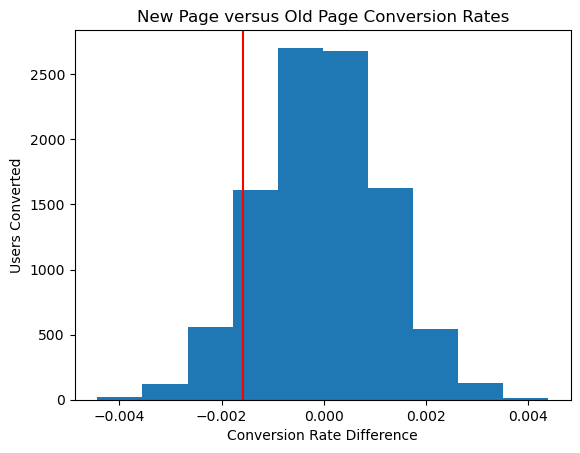

In [204]:
# Convert p_diffs to a numpy array so it can be ploted in a histogram
p_diffs = np.array(p_diffs)

# Create the histogram
plt.hist(p_diffs);
plt.xlabel('Conversion Rate Difference')
plt.ylabel('Users Converted')
plt.title('New Page versus Old Page Conversion Rates')
plt.axvline(x=obs_diff, c="r")
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [205]:
# Calculate the final pValue 
p_val_final = (p_diffs > obs_diff).mean()
p_val_final

0.9047

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

<b>Answer:</b> P-values are used to either reject the null hypothesis or fail to reject the null hypothesis. P-values range from 0 (reject null) to 1 (fail to reject). To reject the null hypothesis, we want a value less than or equal to 0.05. The actual observed difference from the ab_data.csv was compared to the p_diffs distribution of means and resulted in a p-value of 0.9027. Based on this p-value, our random sampling failed to reject the null hypothesis. In other words, there is no statistical evidence that the new_page is better than the old_page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [206]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]

# number of individuals who were shown the old_page
n_old = df2['landing_page'].value_counts()['old_page']

# number of individuals who received new_page
n_new = df2['landing_page'].value_counts()['new_page']

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---


In [207]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')
print(z_score, p_value)

1.3109241984234394 0.09494168724097551


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

<b>Answer:</b> For this test, which is a right-tailed test, we will reject the null hypothesis if $Z_{score}$ > $Z_{\alpha}$.<br>
$Z_{\alpha}$ or $Z_{0.05}$ equals 1.645<br>
<br>
Based on the above results, our $Z_{score}$ is 1.311 which is less than 1.645, so we fail to reject our null hypothesis.<br>
<br>
The reported p_value is 0.095 which is less than the original value of 0.9063 calculated above. This is because we originally set the p_old & p_new to the same value:<br>
$p_{new}$ = $p_{old}$ = $p_{population}$<br><br>
Since the old_page actually converted more users than the new_page, the true p_old and p_new are different, resulting in a different p_value.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

<b>Answer:</b> I will be using Logistic Regression since that is what is used when you want to predict only one of two possible outcomes.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [208]:
# Add additional columns for Logistic Regression
df2['intercept'] = 1

# Get dummies for group column and use treatment as the desired value for 1, control will get 0
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [209]:
# Create Logit model using statsmodels
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [210]:
# Summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2023-06-19 20:37 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [211]:
# To correctly interpret the coef values, we need to convert using the exponent. Since it is negative, we need to also calculate the reciprocal
1 / np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

<b>Answer:</b> To summarize the above, a user of the old page is 1.015 times more likely to convert than a user of the old page, holding all other variables constant. Based on this value, we can fail to reject our null hypothesis and not reccommend the new page.

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


<b>Answer:</b> The null and alternative hypothesis test associated with the regression model is a two-tailed test.<br>
<center>

**$H_0$**: **$β_{1}$** = 0

**$H_1$**: **$β_{1}$** ≠ 0
</center>
The null and alternative hypothesis test in Part II was a right-tailed test<br>
<center>

**$H_0$**:   **$p_{new}$** - **$p_{old}$** <= 0

**$H_1$**:   **$p_{new}$** - **$p_{old}$** > 0
</center>
<br>
Because the p-value was generated differently between the two tests, the p-value is different. It sill does not satisfy our Type I error rate (0.05) and has less than 95% confidence.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<b>Answer:</b> There are a multitude of different factors that might influence whether a user converts or not. Factors such as age, gender, or familiarity with the old page could be taken into account. Users in the treatment group who might be frequent visitors may experience "momentum behavior" that may introduce bias into the study.<br><br>
Adding additional data points into the regression model may introduce multicollinearity where our explanitory variables have correlations to each other that may impact our response variables.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [212]:
# Read the countries.csv
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [213]:
# Join with the df2 dataframe
df_merged = pd.merge(df2, df_country)
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [214]:
# Create the necessary dummy variables
df_merged[['UK', 'US', 'CA']] = pd.get_dummies(df_merged['country'])
df_merged.drop('US', axis=1, inplace=True)
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [215]:
# Fit your model, and summarize the results
logit_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'CA']])
results = logit_mod.fit()
results.summary2(), np.exp(results.params), 1 / np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


(<class 'statsmodels.iolib.summary2.Summary'>
 """
                           Results: Logit
 Model:              Logit            Pseudo R-squared: 0.000      
 Dependent Variable: converted        AIC:              212781.1253
 Date:               2023-06-19 20:37 BIC:              212823.4439
 No. Observations:   290584           Log-Likelihood:   -1.0639e+05
 Df Model:           3                LL-Null:          -1.0639e+05
 Df Residuals:       290580           LLR p-value:      0.17599    
 Converged:          1.0000           Scale:            1.0000     
 No. Iterations:     6.0000                                        
 -------------------------------------------------------------------
               Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
 -------------------------------------------------------------------
 intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
 ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
 UK           -0.0

<b>Page Conversion Rates:</b>
- CA is 1.0099 times less likely to convert than in the US, holding all other variables constant.
- UK is 1.0519 times less likely to convert than in the US, holding all other variables constant.
- The Treatment group is 1.0150 times less likely to convert than the Control group, holding all other variables constant.


<b>P-Values:</b>
- ab_page: 0.1912
- UK: 0.0745
- CA: 0.4573

When looking at the p-values, they are all greater than 0.05 showing that they are statistically insignificant. Because of this, we fail to reject our null hypothesis.


In [216]:
# Create new columns for the ab_page and the country. Multiply the values in the two columns to give us a 0 or 1 result.
df_merged['UK_page'] = df_merged['ab_page'] * df_merged['UK']
df_merged['CA_page'] = df_merged['ab_page'] * df_merged['CA']

df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,CA,UK_page,CA_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


<br>
Now lets take a look at how page interacts with country.

In [217]:
# Create new Logit model for the results
page_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'CA', 'UK_page', 'CA_page']])
results = page_mod.fit()
results.summary2(), np.exp(results.params), 1 / np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


(<class 'statsmodels.iolib.summary2.Summary'>
 """
                           Results: Logit
 Model:              Logit            Pseudo R-squared: 0.000      
 Dependent Variable: converted        AIC:              212782.6602
 Date:               2023-06-19 20:37 BIC:              212846.1381
 No. Observations:   290584           Log-Likelihood:   -1.0639e+05
 Df Model:           5                LL-Null:          -1.0639e+05
 Df Residuals:       290578           LLR p-value:      0.19199    
 Converged:          1.0000           Scale:            1.0000     
 No. Iterations:     6.0000                                        
 -------------------------------------------------------------------
               Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
 -------------------------------------------------------------------
 intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
 ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
 UK           -0.0

When comparing page to country, the P-Values become even more statisticly insignificant for CA and UK. UK_page and CA_page still do not achieve our Type I Error Rate of 0.05 providing further justification in failing to reject our null hypothesis.


<b>Conclusion:</b>
In the above analysis, we found that in the raw data, the treatment group did not convert to the new page at a better rate than the control group. Bootstrap sampling was conducted for hypothesis testing asuming the conversion rate was the same for both groups. The A/B probability testing failed to reject the null. The two-sample z-test yielded simmilar results. Finally, the logistic regression testing was conducted, again yielding similar results.<br><br>
In the end, we have failed to reject our null hypothesis and the treatment group did not get better results than the control group. Based on these results, the old landing page should remain and the new landing page should be discarded.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [219]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1